In [1]:
%run ../Funciones_auxiliares/Funciones_auxiliares.ipynb

## ¿Qué es PCA?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dado que trabajaremos con números aleatorios, fijamos la semilla
np.random.seed(42)

x = 3 * np.random.rand(200) # Generamos 200 números aleatorios entre 0 y 3
y = 20 * x + 2 * np.random.randn(200)

x = x.reshape(200, 1)
y = y.reshape(200, 1)

xy = np.hstack([x, y]) # Concatenamos las dos columnas en una matriz de 200x2

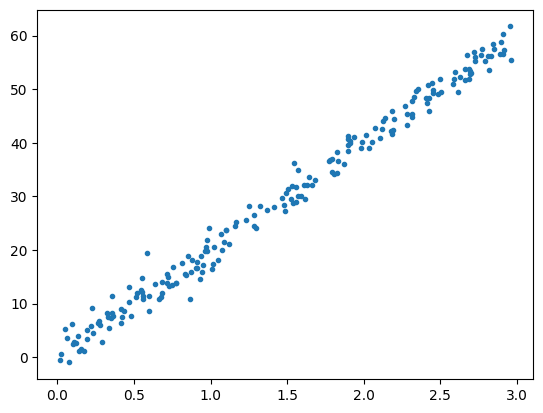

In [4]:
# graficamos los datos
plt.plot(xy[:, 0], xy[:, 1], '.');

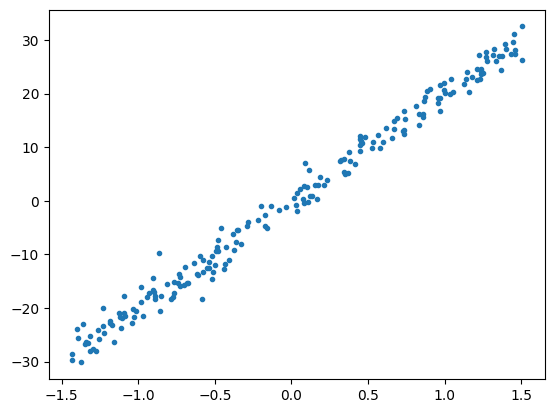

In [5]:
xy_centrado = xy - np.mean(xy, axis=0)

# Graficamos nuestros datos centrados en la media.
plt.plot(xy_centrado[:, 0], xy_centrado[:, 1], '.');

In [6]:
# Calculamos los autovalores y autovectores
autovalores, autovectores = np.linalg.eig(xy_centrado.T @ xy_centrado)
autovectores

array([[-0.9987754 , -0.04947417],
       [ 0.04947417, -0.9987754 ]])

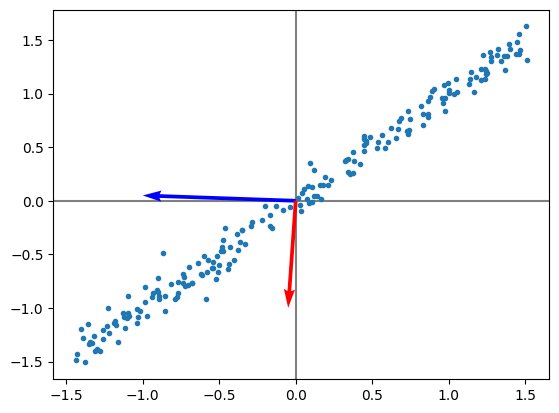

In [7]:
# Para observar como se relacionan los autovectores con el comportamiento de los datos, graficamos los datos y los autovectores
graficarVectores(autovectores.T, ['blue', 'red'])
plt.plot(xy_centrado[:, 0], xy_centrado[:, 1]/20, '.');

In [8]:
# mostrar los autovalores
autovalores

array([1.85050946e+00, 6.28759594e+04])

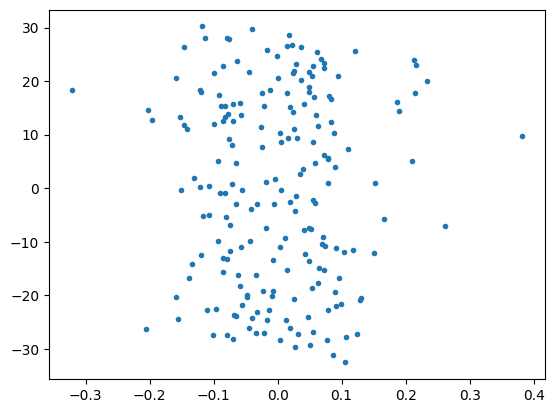

In [9]:
# Proyectamos los datos
xy_nuevo = autovectores.T @ xy_centrado.T

# Graficamos los datos proyectados
plt.plot(xy_nuevo[0, :], xy_nuevo[1, :], '.');

## Preparando el conjunto de imágenes para aplicar PCA

In [10]:
# cargamos los datos utilizando la librería sklearn
import sklearn.datasets
data = sklearn.datasets.fetch_olivetti_faces()

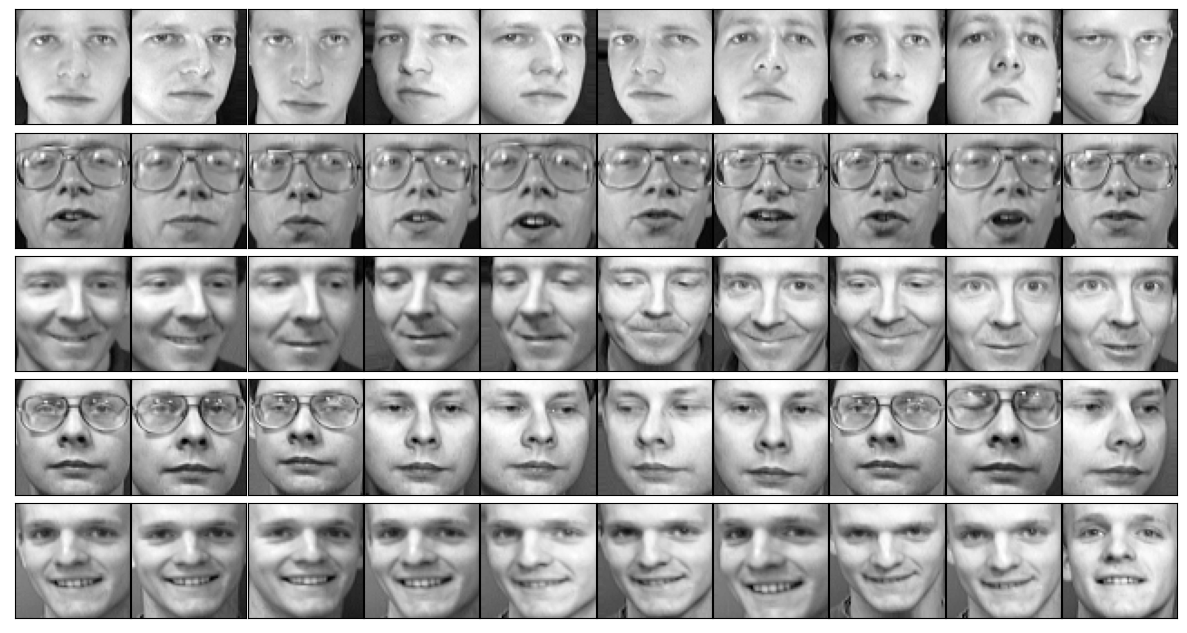

In [11]:
caras = data.data
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras[i].reshape(64,64), cmap = "gray")

## Apliquemos PCA a un conjunto de imágenes

In [12]:
# importamos la librería PCA
from sklearn.decomposition import PCA

# indicamos el porcentaje de información a obtener y aplicar el método.
caras = data.data
caras_pca =PCA(n_components = 0.5)  # 50% de información
caras_pca.fit(caras) # ejecutarPCA

PCA(n_components=0.5)

In [13]:
print(caras_pca.n_components_)

4


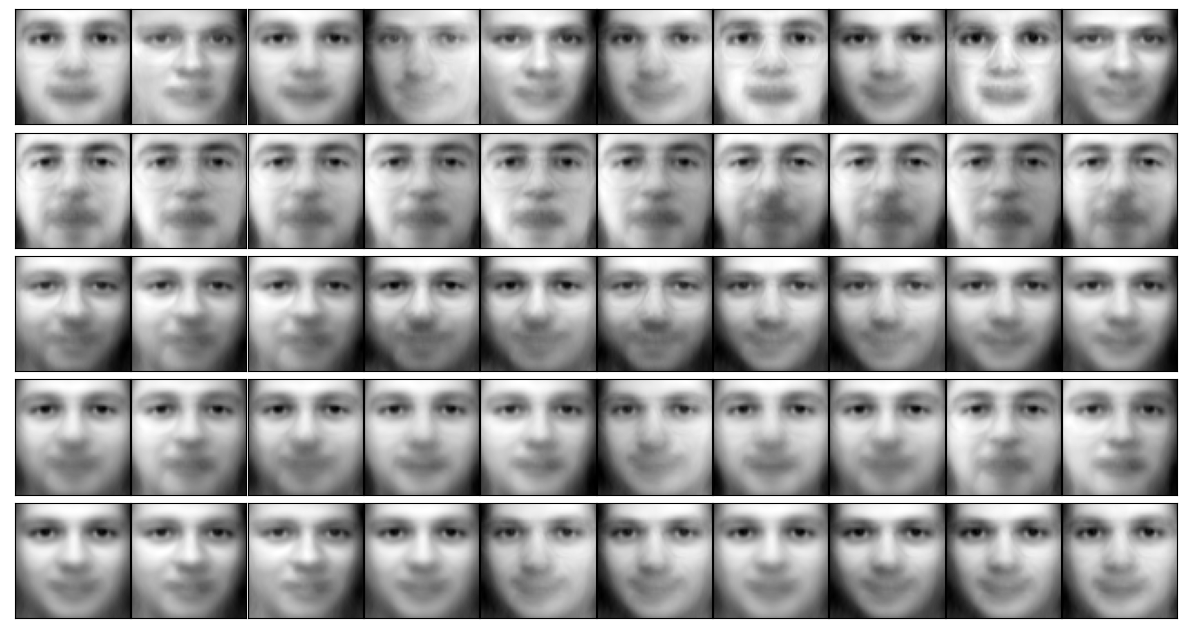

In [14]:
# Mostramos el resultado del procesamiento y evaluamos la información que se ha perdido

componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(64,64), cmap = "gray")